In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import VarianceThreshold
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import classification_report


from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Hill-valley Detection Data Set

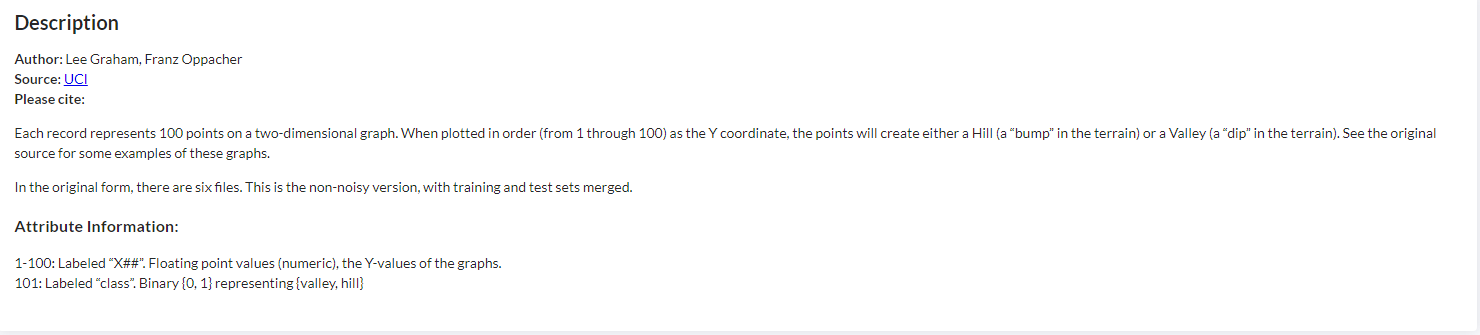

##### First we need to read the dataset itself:

In [2]:
df=pd.read_csv('php3isjYz.csv')
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51,1
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77,0
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77,1
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82,1


#### Let's take a look to the data shape:

In [3]:
print(df.shape)

(1212, 101)


### let's take a look about the data types

In [4]:
print(df.dtypes)

V1       float64
V2       float64
V3       float64
V4       float64
V5       float64
          ...   
V97      float64
V98      float64
V99      float64
V100     float64
Class      int64
Length: 101, dtype: object


#### there we found there all data is float and there only one class is int which is the label class

### Let's check is there is any nulls 

In [5]:
df.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V97      0
V98      0
V99      0
V100     0
Class    0
Length: 101, dtype: int64

### We can found there is no nulls in the data but let's check using the heatmap also:

<AxesSubplot:>

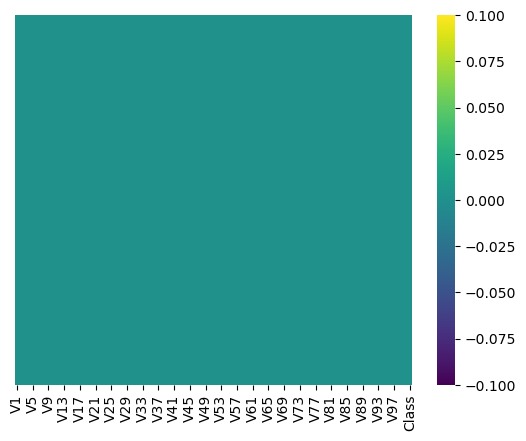

In [6]:
sns.heatmap(df.isna(), yticklabels = False, cbar = True, cmap = 'viridis')

### Here we can found there is no null values in the data

#### let's check if there is any duplicates

In [7]:
df.duplicated().sum()

0

# lets make sure of the label data type and classes.

In [8]:
print(df["Class"].dtypes)
print(df["Class"].unique())

int64
[0 1]


### let's check the instances of each class to make sure the dataset is balanced or not:

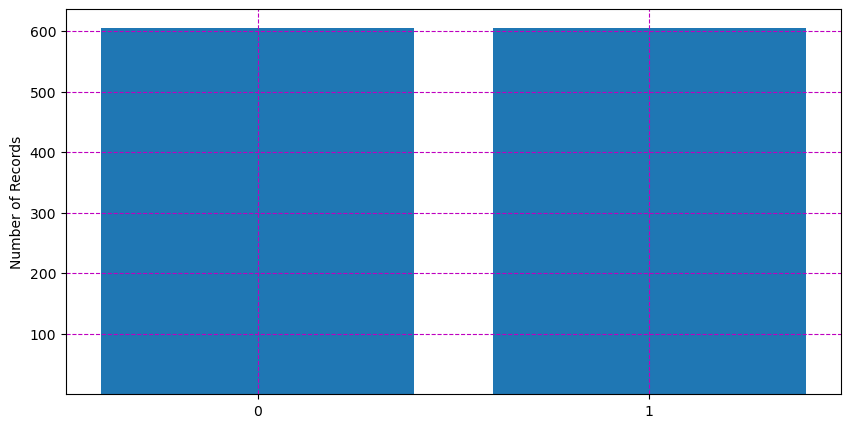

In [9]:
fig = plt.figure(figsize =(10,5))
unique, counts = np.unique(df["Class"], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
plt.bar(*zip(*CountOfClasses.items()))
plt.grid(linestyle = "dashed", color = "m")
plt.xticks([0,1])
plt.yticks(range(100,650,100))
plt.ylabel("Number of Records")
plt.show()

### oversampling techniques are not required, because both class are equal in the dataset

### what about the outliers?

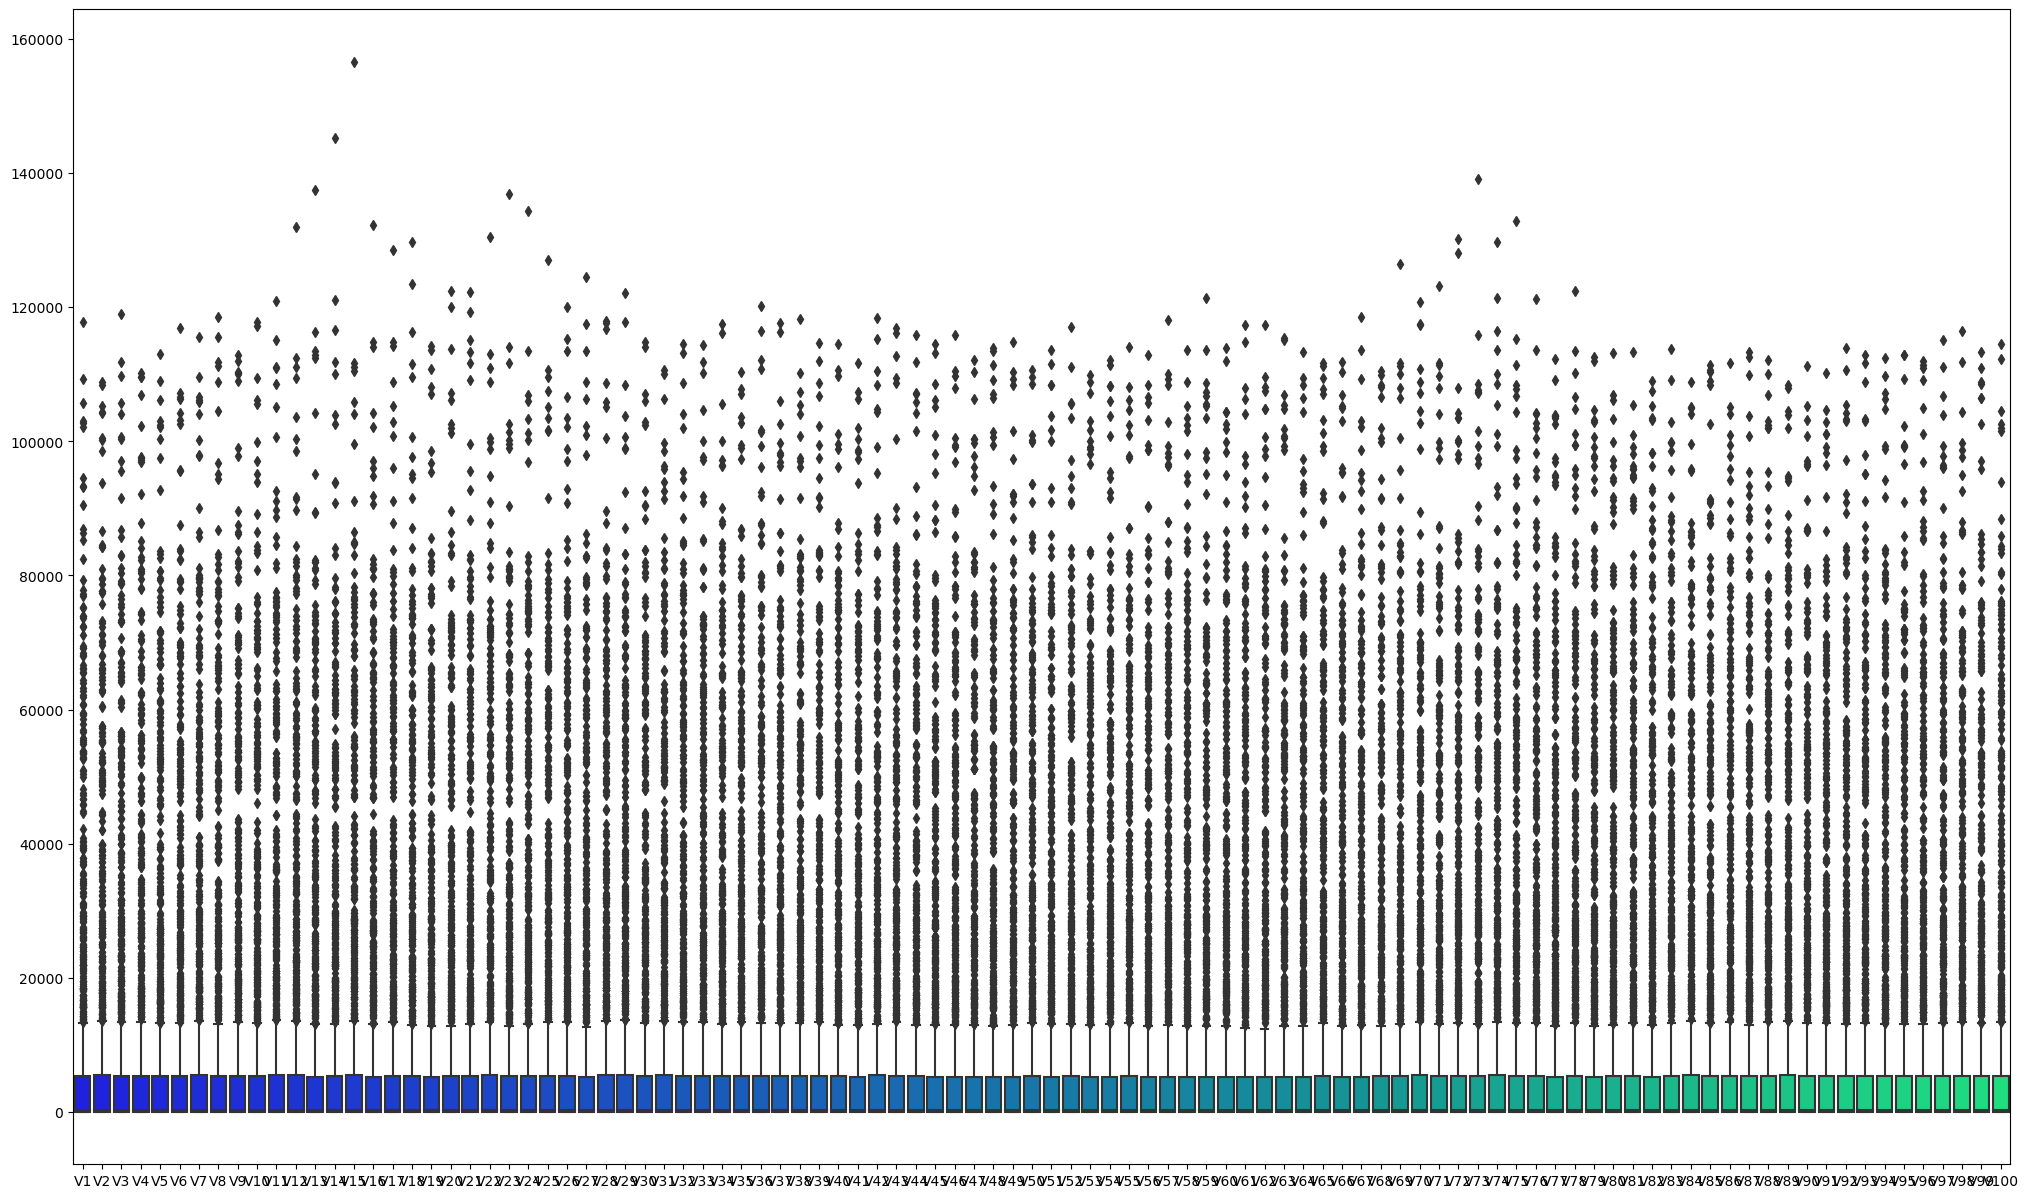

In [10]:
##checking outliers
data_half = df.iloc[:, :100]
plt.figure(figsize=(25,15)) 
sns.boxplot(data = data_half, palette='winter')
plt.show()

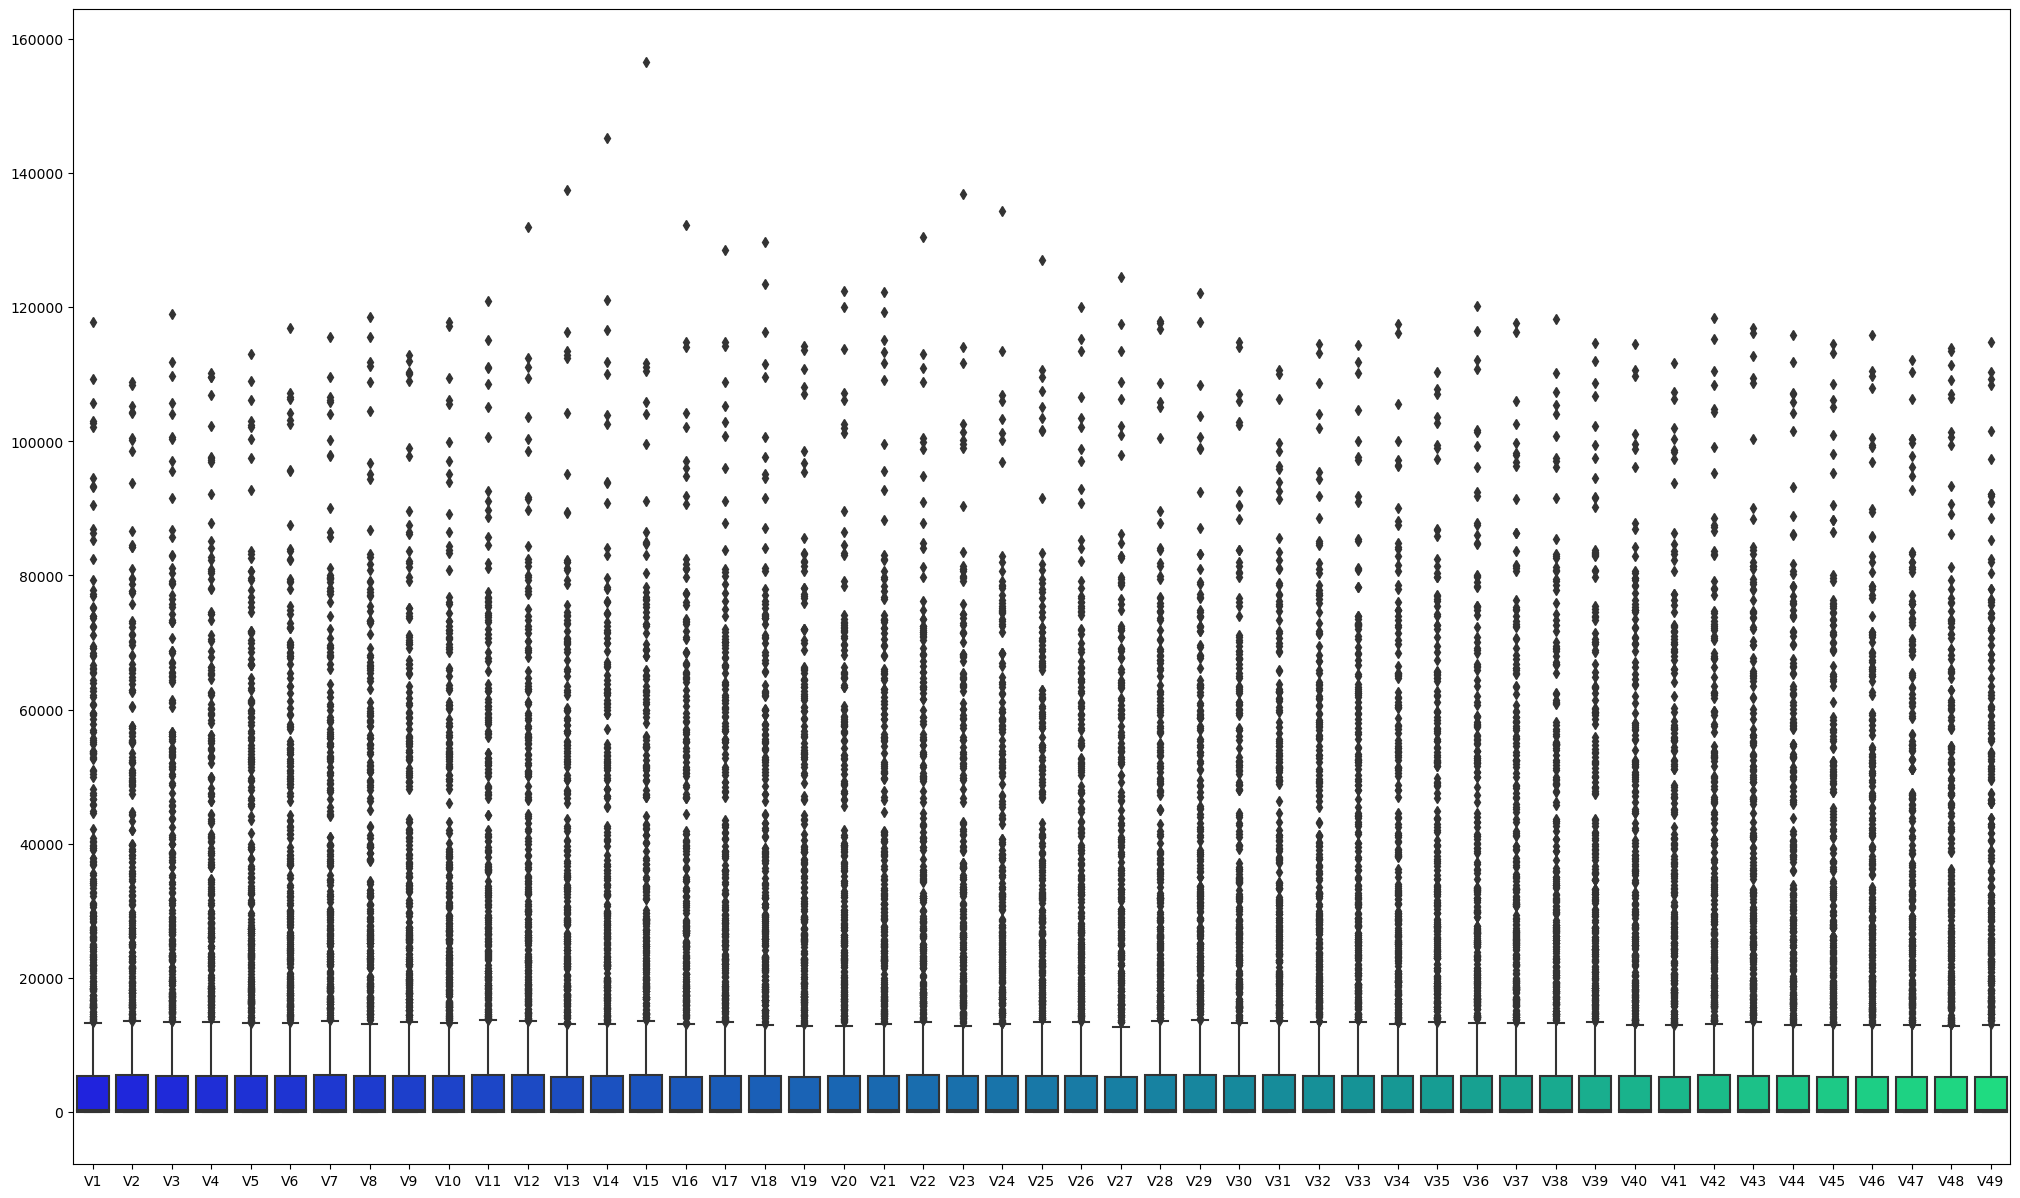

In [11]:
##checking outliers
data_half = df.iloc[:, :49]
plt.figure(figsize=(25,15)) 
sns.boxplot(data = data_half, palette='winter')
plt.show()

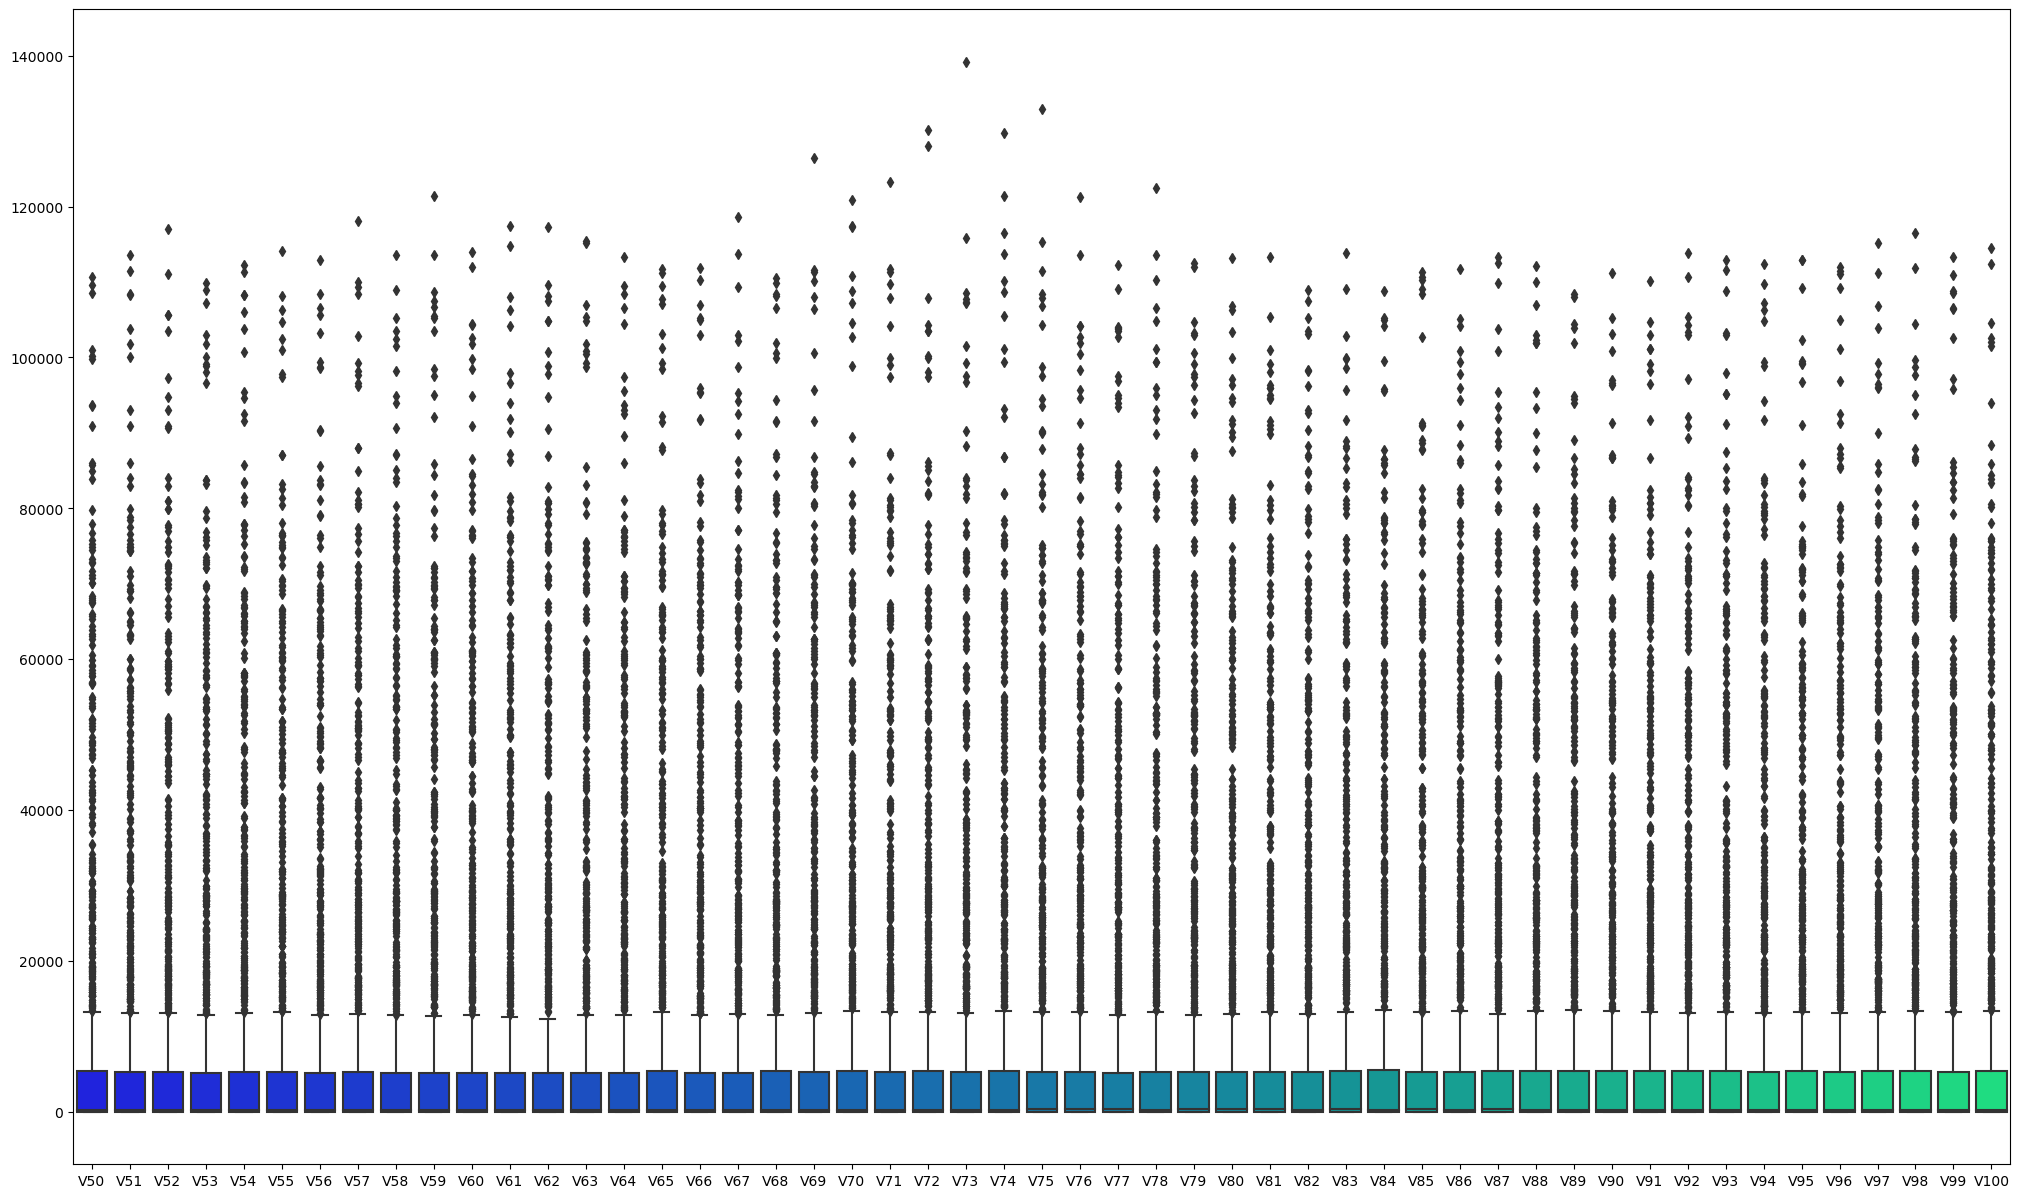

In [12]:
##checking outliers
data_half = df.iloc[:, 49:100]
plt.figure(figsize=(25,15)) 
sns.boxplot(data = data_half, palette='winter')
plt.show()

### What about trying feature selection?

In [13]:
dataFeatures = df.iloc[:,0:-1]
DataLabel = df[ "Class"]
df.var()

V1       3.230988e+08
V2       3.197319e+08
V3       3.271735e+08
V4       3.237086e+08
V5       3.185068e+08
             ...     
V97      3.224210e+08
V98      3.157145e+08
V99      3.263363e+08
V100     3.178843e+08
Class    2.502064e-01
Length: 101, dtype: float64

### There is a high variance

### Let's drop features which don't reach the threshold...

In [14]:
vt = VarianceThreshold(threshold=330000000)
vt.fit(dataFeatures)
varince_of_data = pd.DataFrame({'variance': vt.variances_,'select_feature': vt.get_support()},index=dataFeatures.columns)
varince_of_data[varince_of_data["select_feature"] == True]

,variance,select_feature
V15,3.317133e+08,True
V18,3.316550e+08,True
V54,3.321125e+08,True
V59,3.352760e+08,True
V62,3.321005e+08,True
V65,3.314809e+08,True
V68,3.304236e+08,True
V69,3.339946e+08,True
V72,3.341011e+08,True
V73,3.329399e+08,True


In [15]:
subset_FS = dataFeatures.iloc[:,vt.get_support()].head()
subset_FS.columns

Index(['V15', 'V18', 'V54', 'V59', 'V62', 'V65', 'V68', 'V69', 'V72', 'V73',
       'V74', 'V75', 'V76', 'V77', 'V78', 'V79'],
      dtype='object')

In [16]:
dataFeatures = dataFeatures[subset_FS.columns]
dataFeatures

,V15,V18,V54,V59,V62,V65,V68,V69,V72,V73,V74,V75,V76,V77,V78,V79
0,37.21,38.95,33.91,36.95,37.32,37.01,38.87,38.03,38.61,36.23,37.81,37.98,38.58,38.96,38.97,39.08
1,1.74,2.02,1.76,1.66,1.65,1.69,1.82,1.78,1.82,1.71,1.83,1.72,1.63,1.77,1.69,1.81
2,75236.92,73902.96,67212.35,69415.46,74298.25,69584.85,75450.36,70029.97,72576.15,73573.75,76410.68,83257.85,76957.31,80125.79,83178.08,86976.04
3,33536.08,30575.53,40986.25,42449.71,45465.54,46174.22,48607.01,40804.21,43324.00,40089.31,43590.66,44508.23,44542.14,40139.58,43882.35,44777.21
4,5.68,5.33,5.71,5.50,5.44,5.92,5.19,5.11,5.07,4.89,4.90,4.70,4.90,3.96,3.61,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,16.00,15.30,12.31,13.05,13.70,12.43,12.64,13.65,13.14,13.36,13.47,13.74,12.75,13.45,12.39,12.56
1208,49.72,48.52,48.49,48.58,49.17,49.77,49.03,48.14,47.89,48.77,48.62,47.21,46.43,48.01,45.30,45.60
1209,9750.84,9701.79,10117.23,10144.94,10840.44,10209.92,11671.85,11624.11,12638.05,12124.44,11262.25,11636.54,11789.61,11471.29,9839.81,10573.46
1210,35.50,37.56,33.99,33.43,31.22,32.94,32.26,31.69,33.51,35.42,32.62,31.61,31.53,35.06,35.44,34.46


### Now let's try to get the outliers for the features

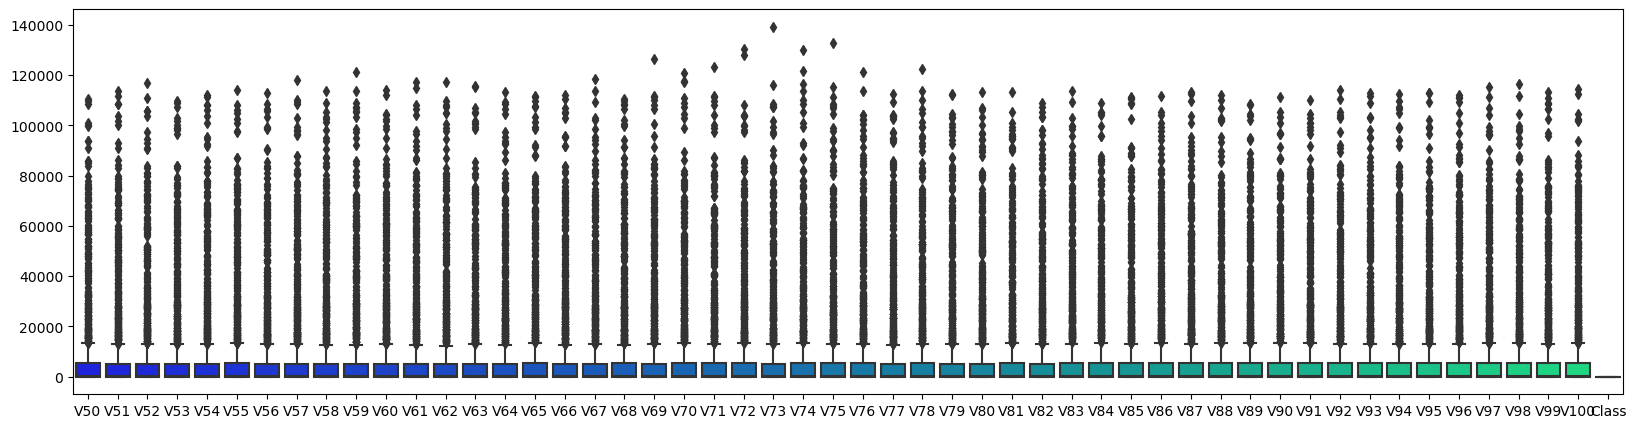

In [17]:
data_half = df.iloc[:, 49:]
plt.figure(figsize=(20,5)) 
sns.boxplot(data = data_half, palette='winter')
plt.show()

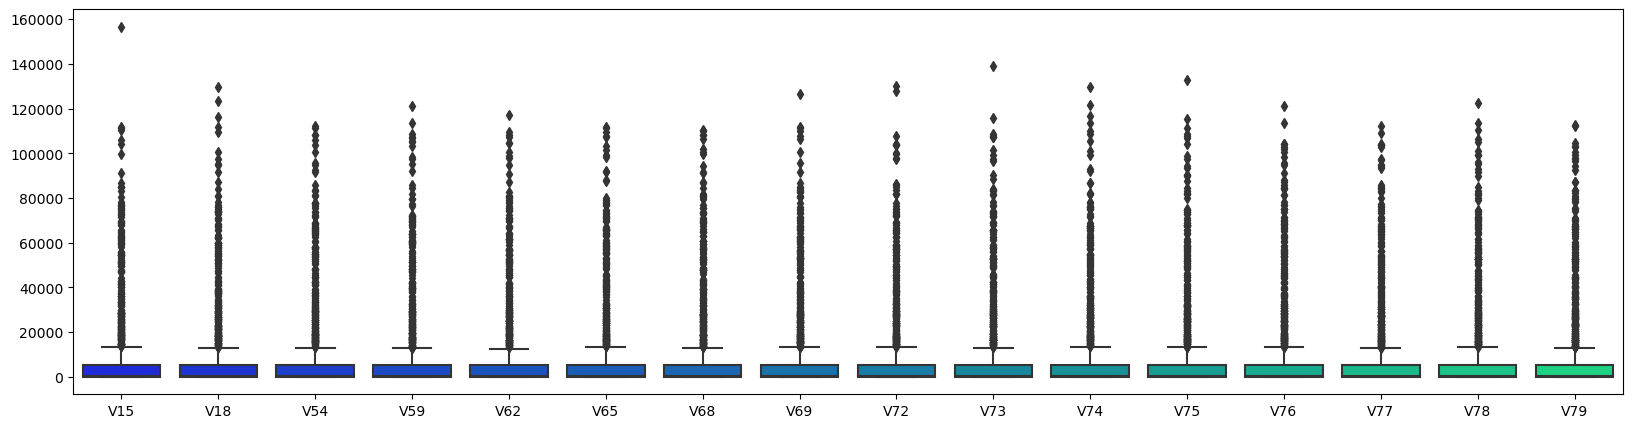

In [18]:
dataFeatures = dataFeatures.iloc[:, :]
plt.figure(figsize=(20,5)) 
sns.boxplot(data = dataFeatures, palette='winter')
plt.show()

# Let the work begins:

In [19]:
x = dataFeatures.iloc[:,:-1]
y = DataLabel

In [20]:
outlierDetector =  LocalOutlierFactor(n_neighbors=20)
result=outlierDetector.fit_predict(x)
Outliers=x[result==-1]
print("Number of detected outliers is " +str(len(Outliers)))

Number of detected outliers is 13


In [21]:
x.shape

(1212, 15)

### We now need to remove all the outliers, so will create new X and Y dataset without the outliers

In [22]:
newX = x[result != -1]
newY = y[result != -1]

In [23]:
newX.shape

(1199, 15)

### splitting the dataset before outlier and after oultier detection

In [24]:
xtrain, xtest, ytrain, ytest = train_test_split(newX, newY, stratify = newY, test_size=0.3, random_state=42)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.fit_transform(xtest)

## Weak Models

## 1.Decision Tree Classifier:

In [25]:
tree1 = DecisionTreeClassifier(max_depth = 4, 
                              criterion="entropy",
                              splitter="random",
                              random_state = 4
                              )
tree1.fit(xtrain, ytrain)
ypred_DT = tree1.predict(xtest)

In [26]:
print("Accuracy of training set before removing the outliers: {:.3f}".format(tree1.score(xtrain,ytrain)))
print("Accuracy of test set before removing the outliers : {:.3f}".format(tree1.score(xtest,ytest)))

Accuracy of training set before removing the outliers: 0.558
Accuracy of test set before removing the outliers : 0.536


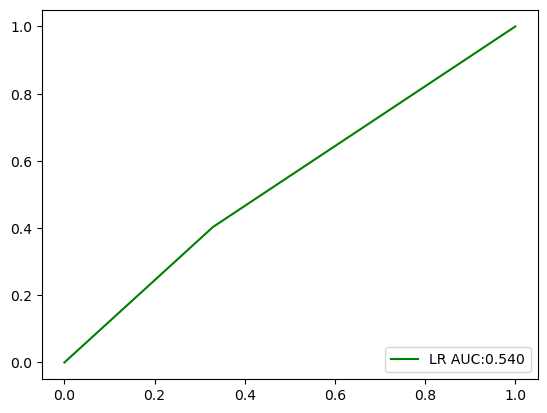

In [27]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
auc = roc_auc_score(ypred_DT, ytest)

fpr, tpr, thresholds = roc_curve(ytest, ypred_DT)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [28]:
# classification Report
from sklearn.metrics import classification_report
tn = [ "0","1"]
cf_rep = classification_report(ytest, ypred_DT, target_names=tn)

print(cf_rep)

              precision    recall  f1-score   support

           0       0.53      0.67      0.59       179
           1       0.55      0.40      0.47       181

    accuracy                           0.54       360
   macro avg       0.54      0.54      0.53       360
weighted avg       0.54      0.54      0.53       360



C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


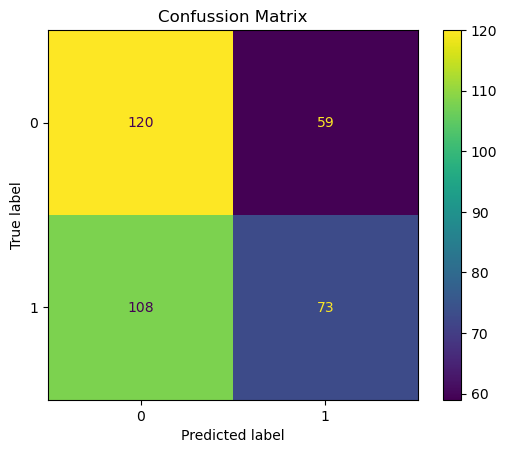

In [29]:
plot_confusion_matrix(tree1, xtest, ytest)  
plt.title('Confussion Matrix')
plt.show()

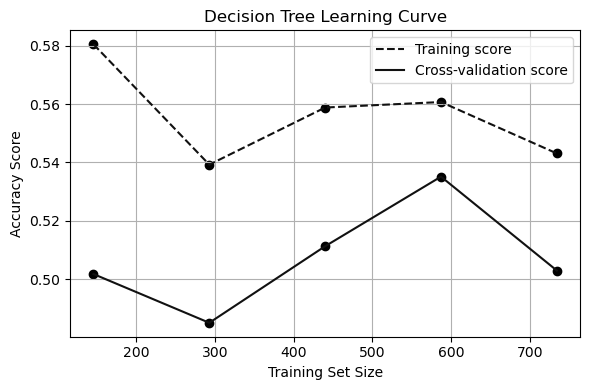

In [30]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree1,
    X=xtrain,
    y=ytrain,
    cv=8,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.subplots(1, figsize=(6,4))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='black')
plt.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='black')


plt.grid()
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

### this is before removing the outliers

## what about after removing the outliers?

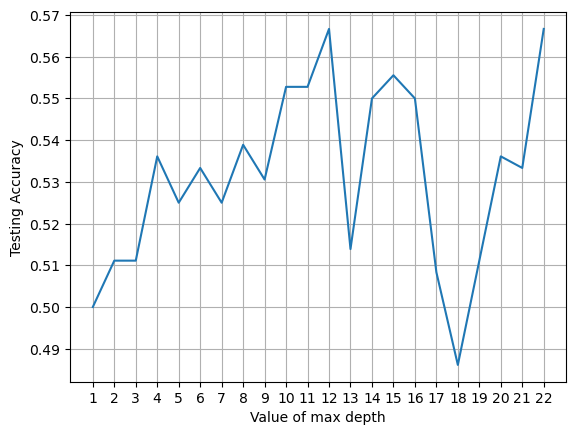

In [31]:
n_range = range(1, 23)
scores = []

for n in n_range:
    tree = DecisionTreeClassifier(max_depth = n, 
                              criterion="entropy",
                              splitter="random",
                              random_state = 4
                              )
    tree.fit(xtrain, ytrain)
    ypred_DT = tree.predict(xtest)
    scores.append(accuracy_score(ytest, ypred_DT))
plt.xticks(n_range)
plt.plot(n_range, scores)
plt.grid(visible=True)
plt.xlabel('Value of max depth')
plt.ylabel('Testing Accuracy')
plt.show()

## According to the previous plot the max_depth scoured the best accuracy was 22

#### So now we need to update the tree with max_depth=22

In [32]:
tree2 = DecisionTreeClassifier(max_depth = 22, 
                              criterion="entropy",
                              splitter="random",
                              random_state = 4
                              )
tree2.fit(xtrain, ytrain)
y_pred_DT2 = tree2.predict(xtest)

In [33]:
print("Accuracy of training set after removing the outlaiers: {:.3f}".format(tree2.score(xtrain,ytrain)))
print("Accuracy of test set after removing the outlaiers : {:.3f}".format(tree2.score(xtest,ytest)))

Accuracy of training set after removing the outlaiers: 0.822
Accuracy of test set after removing the outlaiers : 0.567


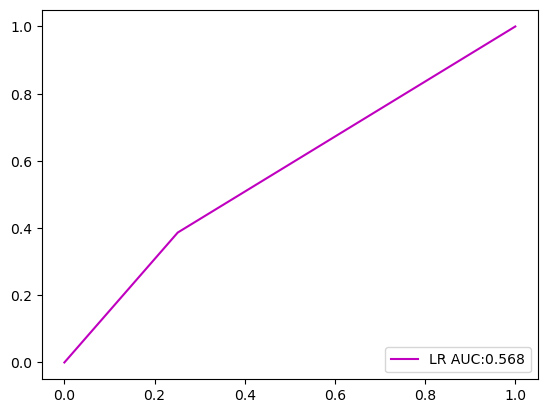

In [34]:


auc = roc_auc_score(ytest, y_pred_DT2)

fpr, tpr, thresholds = roc_curve(ytest, y_pred_DT2)
plt.plot(fpr, tpr, 'm',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()


In [35]:
# classification Report


tn = [ "0","1"]
cf_rep = classification_report(ytest, y_pred_DT2, target_names=tn)

print(cf_rep)

              precision    recall  f1-score   support

           0       0.55      0.75      0.63       179
           1       0.61      0.39      0.47       181

    accuracy                           0.57       360
   macro avg       0.58      0.57      0.55       360
weighted avg       0.58      0.57      0.55       360



C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


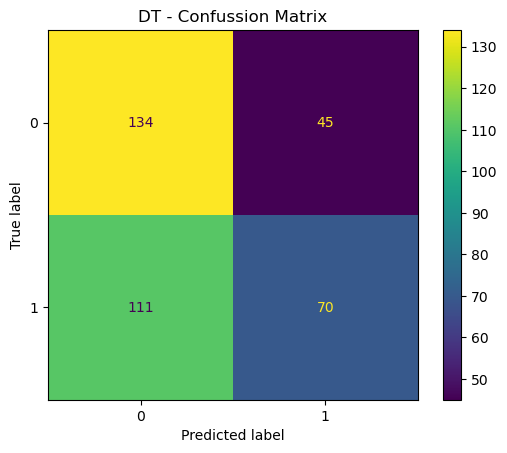

In [36]:
plot_confusion_matrix(tree2, xtest, ytest)  
plt.title('DT - Confussion Matrix')
plt.show()

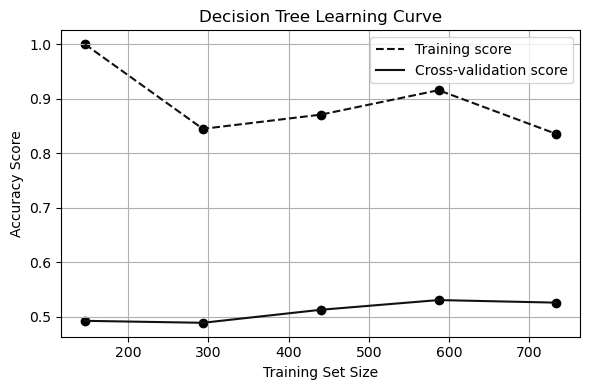

In [37]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree2,
    X=xtrain,
    y=ytrain,
    cv=8,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.subplots(1, figsize=(6,4))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='black')
plt.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='black')


plt.grid()
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [38]:
print(tree.feature_importances_)

[0.03134843 0.0685166  0.11738673 0.05529342 0.05750863 0.06165257
 0.0937053  0.07602744 0.05609796 0.0709382  0.05496955 0.04027636
 0.08340573 0.04857514 0.08429793]


In [39]:
from sklearn.feature_selection import SelectFromModel
sfm = SelectFromModel(tree, prefit=True)

In [40]:
SelectedNames= newX.columns[sfm.get_support()]

In [41]:
x_new = newX[SelectedNames]

In [42]:
x_new

,V18,V54,V68,V69,V73,V76,V78
0,38.95,33.91,38.87,38.03,36.23,38.58,38.97
1,2.02,1.76,1.82,1.78,1.71,1.63,1.69
2,73902.96,67212.35,75450.36,70029.97,73573.75,76957.31,83178.08
3,30575.53,40986.25,48607.01,40804.21,40089.31,44542.14,43882.35
4,5.33,5.71,5.19,5.11,4.89,4.90,3.61
...,...,...,...,...,...,...,...
1207,15.30,12.31,12.64,13.65,13.36,12.75,12.39
1208,48.52,48.49,49.03,48.14,48.77,46.43,45.30
1209,9701.79,10117.23,11671.85,11624.11,12124.44,11789.61,9839.81
1210,37.56,33.99,32.26,31.69,35.42,31.53,35.44


In [43]:
xtrainFS, xtestFS, ytrainFS, ytestFS = train_test_split(x_new, newY, random_state = 42, stratify=newY, test_size=0.3)

In [44]:
tree_FS = DecisionTreeClassifiertree = DecisionTreeClassifier(max_depth = 12, 
                              criterion="entropy",
                              splitter="random",
                              random_state = 4
                              )
tree_FS.fit(xtrainFS, ytrainFS)
y_pred2_FS = tree_FS.predict(xtestFS)
print("Accuracy on training set: {:.3f}".format(tree_FS.score(xtrainFS, ytrainFS)))
print("Accuracy on test set: {:.3f}".format(tree_FS.score(xtestFS, ytestFS)))

Accuracy on training set: 0.678
Accuracy on test set: 0.553


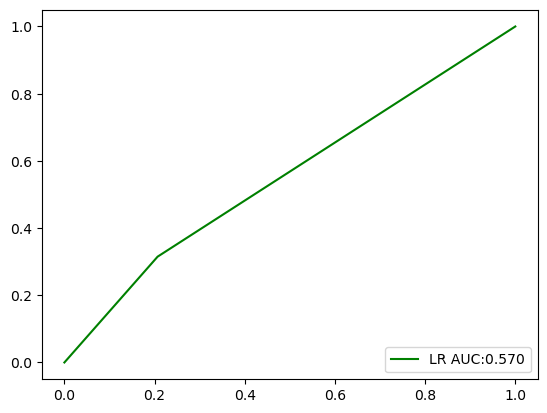

In [45]:

auc = roc_auc_score(y_pred2_FS, ytestFS)

fpr, tpr, thresholds = roc_curve(ytestFS, y_pred2_FS)
plt.plot(fpr, tpr, 'g-',label ='LR AUC:%.3f'%auc)

plt.legend(loc=4)
plt.show()

In [46]:
# classification Report

tn = [ "0","1"]
cf_rep = classification_report(ytestFS, y_pred2_FS, target_names=tn)

print(cf_rep)

              precision    recall  f1-score   support

           0       0.53      0.79      0.64       179
           1       0.61      0.31      0.41       181

    accuracy                           0.55       360
   macro avg       0.57      0.55      0.53       360
weighted avg       0.57      0.55      0.53       360



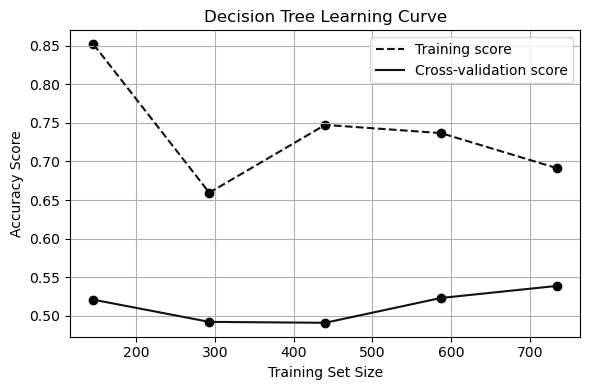

In [47]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=tree_FS,
    X=xtrainFS,
    y=ytrainFS,
    cv=8,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.subplots(1, figsize=(6,4))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='black')
plt.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='black')


plt.grid()
plt.title("Decision Tree Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


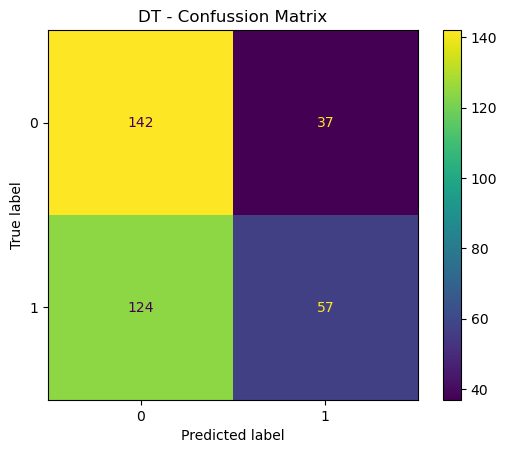

In [48]:
plot_confusion_matrix(tree_FS, xtestFS, ytestFS)  
plt.title('DT - Confussion Matrix')
plt.show()

# 2.Logistic Regression

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x_new, newY, stratify = newY, test_size=0.3, random_state=42)

log_regressor = LogisticRegression()
log_regressor.fit(xtrain, ytrain)
ypred_log = log_regressor.predict(xtest)

In [50]:
print("Accuracy of training set: {:.3f}".format(log_regressor.score(xtrain,ytrain)))
print("Accuracy of test set: {:.3f}".format(log_regressor.score(xtest,ytest)))

Accuracy of training set: 0.507
Accuracy of test set: 0.531


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


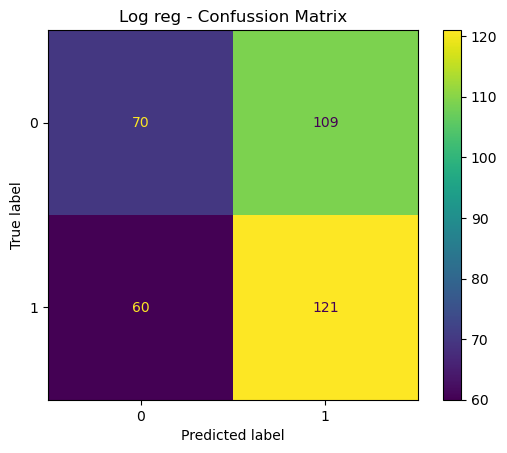

In [51]:
plot_confusion_matrix(log_regressor, xtest, ytest)  
plt.title('Log reg - Confussion Matrix')
plt.show()

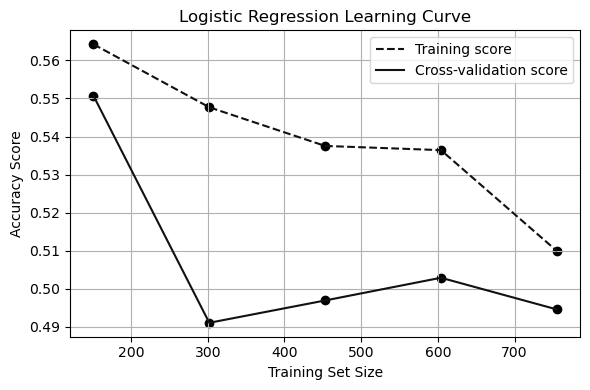

In [52]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=log_regressor,
    X=xtrain,
    y=ytrain,
    cv=10,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.subplots(1, figsize=(6,4))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='black')
plt.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='black')

plt.grid()
plt.title("Logistic Regression Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# 3. SVM classifier:

In [53]:
X_traini, X_testi, y_traini, y_testi = train_test_split(x_new, newY, test_size=0.3, random_state=42)

[0.43333333333333335, 0.4888888888888889, 0.5194444444444445]


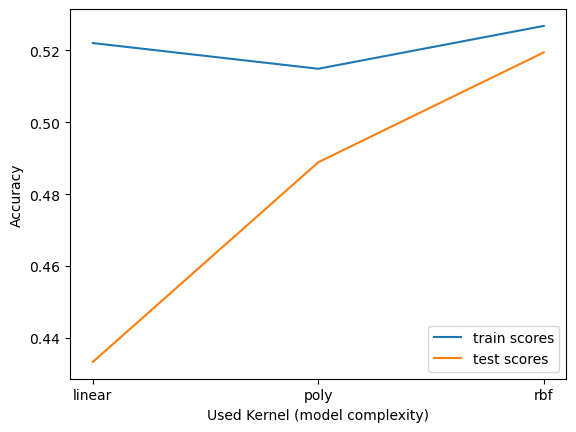

In [54]:
kernels = ['linear', 'poly', 'rbf']
scores_test = []
scores_train = []
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=2).fit(X_traini, y_traini)
    else:
        svc = SVC(kernel=k).fit(X_traini, y_traini)
        
    y_predi = svc.predict(X_testi)
    scores_train.append(accuracy_score(y_traini, svc.predict(X_traini)))
    scores_test.append(accuracy_score(y_testi, y_predi))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

[0.43333333333333335, 0.4888888888888889, 0.5194444444444445, 0.45555555555555555]


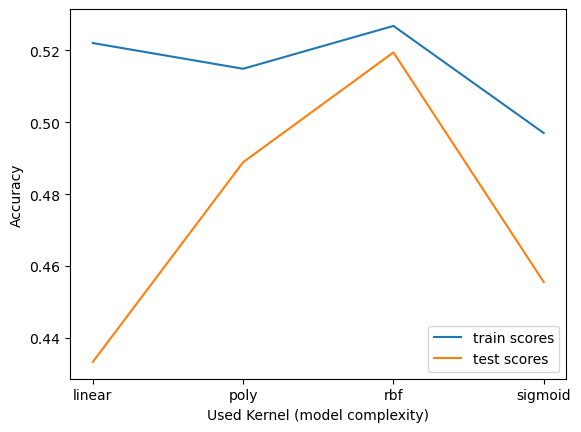

In [55]:
kernels = ['linear', 'poly', 'rbf','sigmoid']
scores_test = []
scores_train = []
for k in kernels:
    if k == "poly4":
        svc = SVC(kernel='poly', degree=2).fit(X_traini, y_traini)
    else:
        svc = SVC(kernel=k).fit(X_traini, y_traini)
        
    y_predi = svc.predict(X_testi)
    scores_train.append(accuracy_score(y_traini, svc.predict(X_traini)))
    scores_test.append(accuracy_score(y_testi, y_predi))

print(scores_test)
plt.plot(kernels, scores_train, label="train scores")
plt.plot(kernels, scores_test, label="test scores")
plt.xlabel('Used Kernel (model complexity)')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

### In the SVM I have used diffrent kernals maybe it get better accuracy:

## According to the previous plot, the RBF kernel has the best accuracy.

### here i'm trying different C values and compare the results using the best kernel (RBF).

In [56]:
clf = SVC(kernel='rbf', C = 1.0, random_state=0)
clf.fit(X_traini, y_traini)

# generate evaluation metrics
print("Train - Accuracy: ", accuracy_score(y_traini, clf.predict(X_traini)))
print("\n Train - classification report: \n", classification_report(y_traini, clf.predict(X_traini)))

print("Test - Accuracy:", accuracy_score(y_testi, clf.predict(X_testi)))
print("\n Test - classification report: \n", classification_report(y_testi, clf.predict(X_testi)))

Train - Accuracy:  0.5268176400476758

 Train - classification report: 
               precision    recall  f1-score   support

           0       0.51      0.93      0.66       413
           1       0.67      0.14      0.23       426

    accuracy                           0.53       839
   macro avg       0.59      0.53      0.44       839
weighted avg       0.59      0.53      0.44       839

Test - Accuracy: 0.5194444444444445

 Test - classification report: 
               precision    recall  f1-score   support

           0       0.52      0.92      0.66       184
           1       0.55      0.10      0.16       176

    accuracy                           0.52       360
   macro avg       0.53      0.51      0.41       360
weighted avg       0.53      0.52      0.42       360



C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


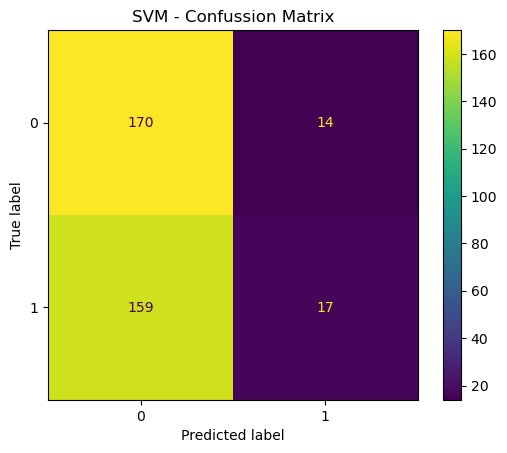

In [57]:
plot_confusion_matrix(clf, X_testi, y_testi)  
plt.title('SVM - Confussion Matrix')
plt.show()

[0.5194444444444445, 0.5277777777777778, 0.5305555555555556, 0.5333333333333333, 0.5277777777777778, 0.5333333333333333, 0.5361111111111111, 0.5361111111111111, 0.5388888888888889, 0.5388888888888889]


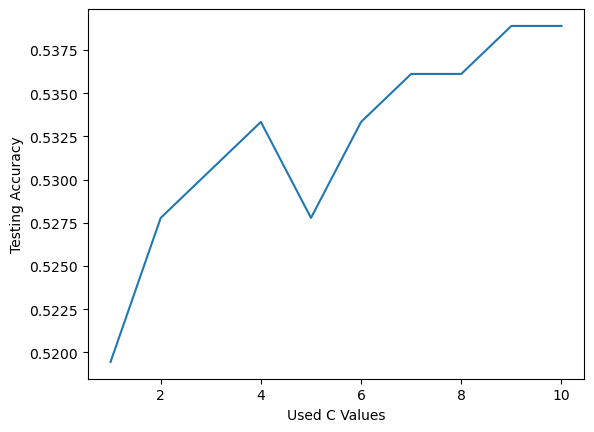

In [58]:
scores22 = []
for k in range(1,11):
    svc = SVC(kernel='rbf', C=k).fit(X_traini, y_traini)
    y_predi = svc.predict(X_testi)
    scores22.append(metrics.accuracy_score(y_testi, y_predi))

print(scores22)
plt.plot(range(1,11), scores22)
plt.xlabel('Used C Values')
plt.ylabel('Testing Accuracy')
plt.show()

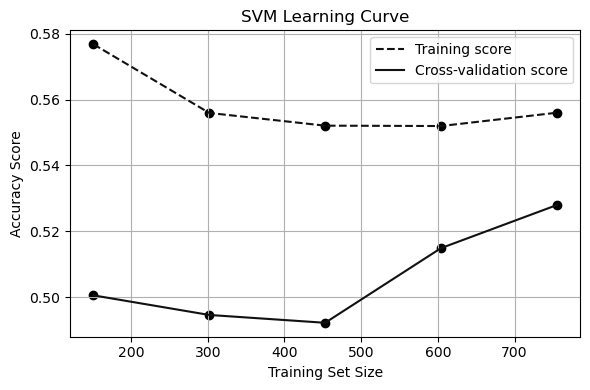

In [59]:
train_sizes, train_scores, test_scores = learning_curve(
    estimator=svc,
    X=X_traini,
    y=y_traini,
    cv=10,
    scoring="accuracy",
    train_sizes = [0.2,0.4,0.6,0.8,1]
)

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.subplots(1, figsize=(6,4))
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

plt.scatter(x=train_sizes,y= train_scores.mean(axis=1), color='black')
plt.scatter(x=train_sizes,y=test_scores.mean(axis=1), color='black')

plt.grid()
plt.title("SVM Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

## If it works, Don't touch it....!

# Ensemble Models:

### Here i just create new object of the dataset and feature selection to work separetly

In [14]:
da_ens=pd.read_csv('php3isjYz.csv')
da_ens

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V92,V93,V94,V95,V96,V97,V98,V99,V100,Class
0,39.02,36.49,38.20,38.85,39.38,39.74,37.02,39.53,38.81,38.79,...,36.62,36.92,38.80,38.52,38.07,36.73,39.46,37.50,39.10,0
1,1.83,1.71,1.77,1.77,1.68,1.78,1.80,1.70,1.75,1.78,...,1.80,1.79,1.77,1.74,1.74,1.80,1.78,1.75,1.69,1
2,68177.69,66138.42,72981.88,74304.33,67549.66,69367.34,69169.41,73268.61,74465.84,72503.37,...,73438.88,71053.35,71112.62,74916.48,72571.58,66348.97,71063.72,67404.27,74920.24,1
3,44889.06,39191.86,40728.46,38576.36,45876.06,47034.00,46611.43,37668.32,40980.89,38466.15,...,42625.67,40684.20,46960.73,44546.80,45410.53,47139.44,43095.68,40888.34,39615.19,0
4,5.70,5.40,5.28,5.38,5.27,5.61,6.00,5.38,5.34,5.87,...,5.17,5.67,5.60,5.94,5.73,5.22,5.30,5.73,5.91,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,13.00,12.87,13.27,13.04,13.19,12.53,14.31,13.33,13.63,14.55,...,12.48,12.15,13.15,12.35,13.58,13.86,12.88,13.87,13.51,1
1208,48.66,50.11,48.55,50.43,50.09,49.67,48.95,48.65,48.63,48.61,...,46.93,49.61,47.16,48.17,47.94,49.81,49.89,47.43,47.77,0
1209,10160.65,9048.63,8994.94,9514.39,9814.74,10195.24,10031.47,10202.28,9152.99,9591.75,...,9068.11,9191.80,9275.04,9848.18,9074.17,9601.74,10366.24,8997.60,9305.77,1
1210,34.81,35.07,34.98,32.37,34.16,34.03,33.31,32.48,35.63,32.48,...,32.76,35.03,32.89,31.91,33.85,35.28,32.49,32.83,34.82,1


In [15]:
print(da_ens["Class"].dtypes)
print(da_ens["Class"].unique())

int64
[0 1]


In [16]:
dataFeatures2 = da_ens.iloc[:,0:-1]
DataLabe2 = da_ens[ "Class"]
da_ens.var()

V1       3.230988e+08
V2       3.197319e+08
V3       3.271735e+08
V4       3.237086e+08
V5       3.185068e+08
             ...     
V97      3.224210e+08
V98      3.157145e+08
V99      3.263363e+08
V100     3.178843e+08
Class    2.502064e-01
Length: 101, dtype: float64

In [20]:
vt2 = VarianceThreshold(threshold=330000000)
vt2.fit(dataFeatures2)
varince_of_data = pd.DataFrame({'variance': vt2.variances_,'select_feature': vt2.get_support()},index=dataFeatures2.columns)
varince_of_data[varince_of_data["select_feature"] == True]

,variance,select_feature
V15,3.317133e+08,True
V18,3.316550e+08,True
V54,3.321125e+08,True
V59,3.352760e+08,True
V62,3.321005e+08,True
V65,3.314809e+08,True
V68,3.304236e+08,True
V69,3.339946e+08,True
V72,3.341011e+08,True
V73,3.329399e+08,True


In [22]:
subset_FS2 = dataFeatures2.iloc[:,vt2.get_support()].head()
subset_FS2.columns

Index(['V15', 'V18', 'V54', 'V59', 'V62', 'V65', 'V68', 'V69', 'V72', 'V73',
       'V74', 'V75', 'V76', 'V77', 'V78', 'V79'],
      dtype='object')

In [23]:
dataFeatures2 = dataFeatures2[subset_FS2.columns]
dataFeatures2

,V15,V18,V54,V59,V62,V65,V68,V69,V72,V73,V74,V75,V76,V77,V78,V79
0,37.21,38.95,33.91,36.95,37.32,37.01,38.87,38.03,38.61,36.23,37.81,37.98,38.58,38.96,38.97,39.08
1,1.74,2.02,1.76,1.66,1.65,1.69,1.82,1.78,1.82,1.71,1.83,1.72,1.63,1.77,1.69,1.81
2,75236.92,73902.96,67212.35,69415.46,74298.25,69584.85,75450.36,70029.97,72576.15,73573.75,76410.68,83257.85,76957.31,80125.79,83178.08,86976.04
3,33536.08,30575.53,40986.25,42449.71,45465.54,46174.22,48607.01,40804.21,43324.00,40089.31,43590.66,44508.23,44542.14,40139.58,43882.35,44777.21
4,5.68,5.33,5.71,5.50,5.44,5.92,5.19,5.11,5.07,4.89,4.90,4.70,4.90,3.96,3.61,4.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,16.00,15.30,12.31,13.05,13.70,12.43,12.64,13.65,13.14,13.36,13.47,13.74,12.75,13.45,12.39,12.56
1208,49.72,48.52,48.49,48.58,49.17,49.77,49.03,48.14,47.89,48.77,48.62,47.21,46.43,48.01,45.30,45.60
1209,9750.84,9701.79,10117.23,10144.94,10840.44,10209.92,11671.85,11624.11,12638.05,12124.44,11262.25,11636.54,11789.61,11471.29,9839.81,10573.46
1210,35.50,37.56,33.99,33.43,31.22,32.94,32.26,31.69,33.51,35.42,32.62,31.61,31.53,35.06,35.44,34.46


In [24]:
xx = dataFeatures2.iloc[:,:-1]
yy = DataLabe2

In [27]:
outlierDetector2 =  LocalOutlierFactor(n_neighbors=20)
result2=outlierDetector2.fit_predict(xx)
Outliers=xx[result2==-1]
print("Number of detected outliers is " +str(len(Outliers)))

Number of detected outliers is 13


In [28]:
xx.shape

(1212, 15)

In [30]:
newXX = xx[result2 != -1]
newYY = yy[result2 != -1]

In [31]:
newXX.shape

(1199, 15)

In [54]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

In [55]:
newXX, newYY = make_moons(n_samples=500, noise=0.30, random_state=42)

In [56]:
xtraini, xtesti, ytraini, ytesti = train_test_split(newXX, newYY, stratify = newYY, test_size=0.3, random_state=42)

In [57]:
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtraini)
xtest = scaler.fit_transform(xtesti)

### First let's create the three estimators for the ensemble model

# 1. Ensemble Voting

## Hard voting vs Soft voting

In [58]:
from sklearn.ensemble import VotingClassifier

## Soft Voting:

In [59]:
log_clf = LogisticRegression(solver="liblinear", random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
svm_clf = SVC(gamma="auto",probability=True, random_state=42)

In [60]:
voting_clf_hard = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)],
    voting='hard')

voting_clf_hard.fit(xtraini, ytraini)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))])

In [61]:
for clf in (log_clf, dt_clf, svm_clf, voting_clf_hard):
    clf.fit(xtraini, ytraini)
    y_pred2 = clf.predict(xtesti)
    print(clf.__class__.__name__, accuracy_score(ytesti, y_pred2))


LogisticRegression 0.82
DecisionTreeClassifier 0.8666666666666667
SVC 0.9
VotingClassifier 0.8666666666666667


## Hard Voting:

In [62]:
voting_clf_soft = VotingClassifier(
    estimators=[('lr', log_clf), ('dt', dt_clf), ('svc', svm_clf)],
    voting='soft')

voting_clf_soft.fit(xtraini, ytraini)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(random_state=42,
                                                 solver='liblinear')),
                             ('dt', DecisionTreeClassifier(random_state=42)),
                             ('svc',
                              SVC(gamma='auto', probability=True,
                                  random_state=42))],
                 voting='soft')

In [63]:
for clf in (log_clf, dt_clf, svm_clf, voting_clf_soft):
    clf.fit(xtraini, ytraini)
    y_pred2 = clf.predict(xtesti)
    print(clf.__class__.__name__, accuracy_score(ytesti, y_pred2))

LogisticRegression 0.82
DecisionTreeClassifier 0.8666666666666667
SVC 0.9
VotingClassifier 0.8933333333333333


## 2. Bagging (Bootstrap Aggregation)

# Descision Tree Stand Alone Vs. Bagging

### Now lets create bagging classifier using decision tree:

In [64]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score

DT_clf = DecisionTreeClassifier(random_state=42)

bag_clf = BaggingClassifier(
    base_estimator= DT_clf, n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(xtraini, ytraini)
y_pred2 = bag_clf.predict(xtesti)

### Now lets Create a Stand Alone Decision Tree Classifier

In [65]:
DT_clf.fit(xtraini, ytraini)
y_pred_tree = DT_clf.predict(xtesti)

### Now let's compare the performance of both models:

In [66]:
print("Descision Tree (Bagging) = ",accuracy_score(ytesti, y_pred2))
print("Descision Tree (Stand Alone) = ", accuracy_score(ytesti, y_pred_tree))

Descision Tree (Bagging) =  0.9266666666666666
Descision Tree (Stand Alone) =  0.8666666666666667


### Now let's See the difference in the decision boundries in both models

In [67]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, newXX, newYY, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

# Now we compare the performance of both models

In [68]:
DT_clf.fit(xtraini, ytraini)
y_pred_tree = DT_clf.predict(xtesti)

In [69]:
print("Descision Tree (Bagging) = ",accuracy_score(ytesti, y_pred2))
print("Descision Tree (Stand Alone) = ", accuracy_score(ytesti, y_pred_tree))

Descision Tree (Bagging) =  0.9266666666666666
Descision Tree (Stand Alone) =  0.8666666666666667


# Let's See the difference in the decision boundries in both models

In [70]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

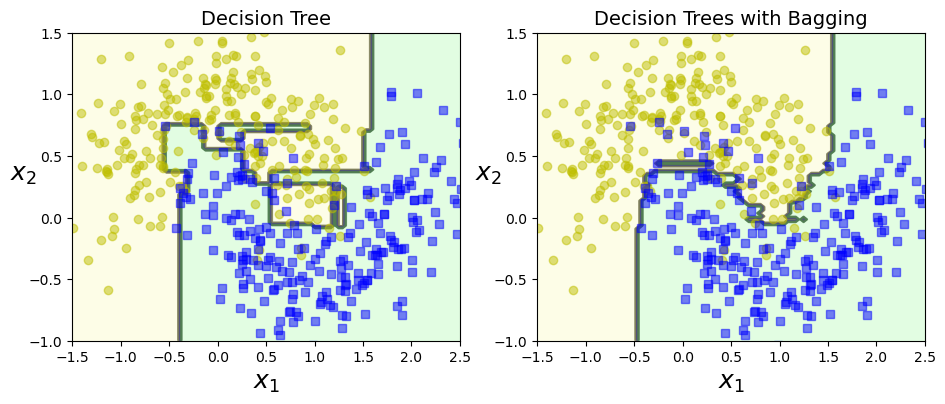

In [71]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(DT_clf, newXX, newYY)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, newXX, newYY)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

## Random Forest

## Random Forest Classifier stands alone VS  bagging classifier with decision tree and random splitter

In [73]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

bag_clf.fit(xtraini, ytraini)
y_pred_rDT = bag_clf.predict(xtesti)

In [74]:
## Creating a Random Forest Classifier model

from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(xtraini, ytraini)

y_pred_rf = rnd_clf.predict(xtesti)

In [75]:
## Comparing Results 
print ("Decision Tree (Bagging with random Splitter) = ", accuracy_score(ytesti, y_pred_rDT))
print("Random Forest = ",accuracy_score(ytesti, y_pred_rf))

Decision Tree (Bagging with random Splitter) =  0.9133333333333333
Random Forest =  0.9066666666666666


In [78]:
np.sum(y_pred2 == y_pred_rf) / len(y_pred2)

0.9533333333333334

## As shown above, the results of both moels are almost the same with 95% similarity.

### What about trying different random forest parameters to obtain the best model ?

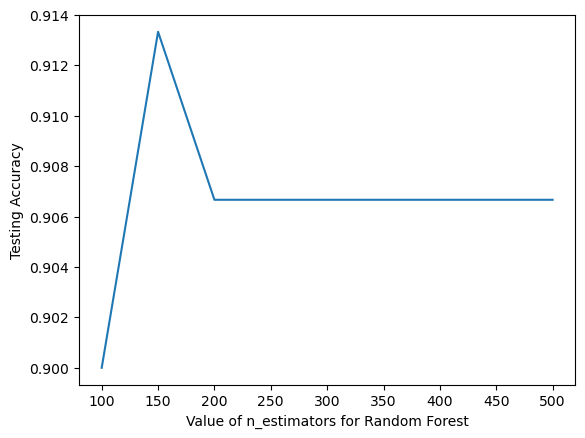

In [79]:
n_range = range(100, 550, 50)
scores = []

for n in n_range:
    rf_clf = RandomForestClassifier(n_estimators=n, max_leaf_nodes=16, n_jobs=-1, random_state=42)
    rf_clf.fit(xtraini, ytraini)
    y_pred_rf = rf_clf.predict(xtesti)
    scores.append(accuracy_score(ytesti, y_pred_rf))

plt.plot(n_range, scores)
plt.xlabel('Value of n_estimators for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

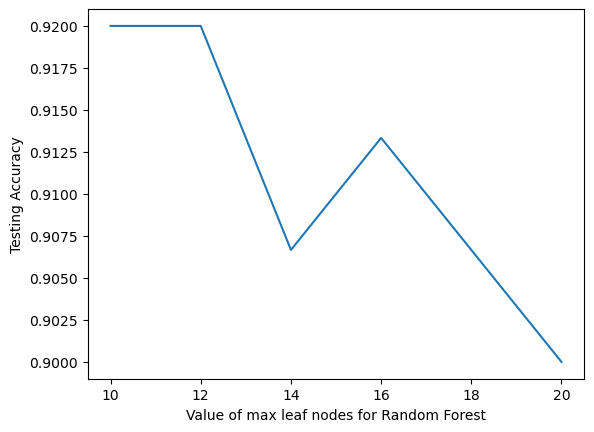

In [80]:
n_nodes = range(10,22,2)
scores = []

for n in n_nodes:
    rf_clf = RandomForestClassifier(n_estimators=150, max_leaf_nodes=n, n_jobs=-1, random_state=42)
    rf_clf.fit(xtraini, ytraini)
    y_pred_rf = rf_clf.predict(xtesti)
    scores.append(accuracy_score(ytesti, y_pred_rf))

plt.plot(n_nodes, scores)
plt.xlabel('Value of max leaf nodes for Random Forest')
plt.ylabel('Testing Accuracy')
plt.show()

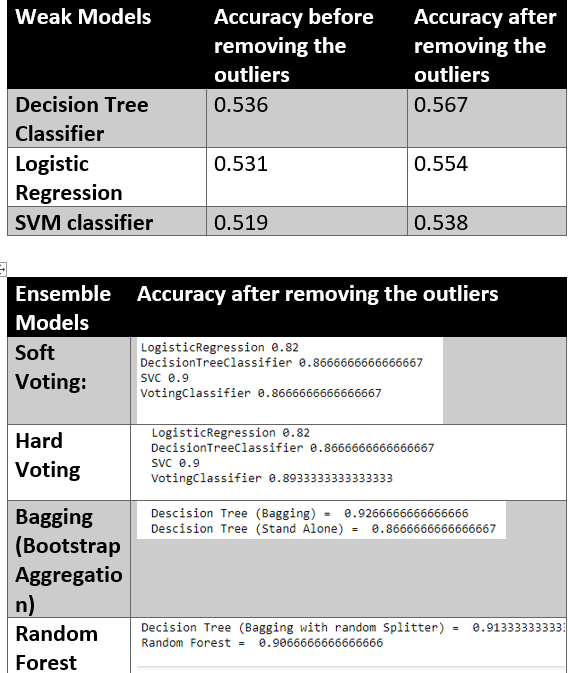

# If it works, don't touch it...!

# Now for the monster level, Imbalanced-Dataset:

## ozone-level-8 hr dataset

In [3]:
da_imb=pd.read_csv('phpdReP6S.csv')
da_imb

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V64,V65,V66,V67,V68,V69,V70,V71,V72,Class
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.00000,-55.000000,0.00,1
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.00000,-55.000000,0.00,1
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.00000,-40.000000,0.00,1
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.00000,-40.000000,2.08,1
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.19844,-0.119949,0.58,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,0.070000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.00000,65.000000,0.00,1
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,0.040000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.00000,15.000000,0.00,1
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,0.060000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.00000,-35.000000,0.00,1
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,0.250000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.00000,-30.000000,0.05,1


In [4]:
da_imb.isnull().sum()

V1       0
V2       0
V3       0
V4       0
V5       0
        ..
V69      0
V70      0
V71      0
V72      0
Class    0
Length: 73, dtype: int64

<AxesSubplot:>

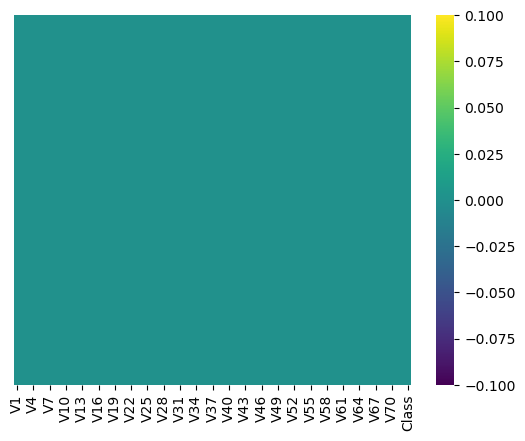

In [5]:
sns.heatmap(da_imb.isna(), yticklabels = False, cbar = True, cmap = 'viridis')

# The data has no nulls 

## Let's check for if it's balanced data or not?

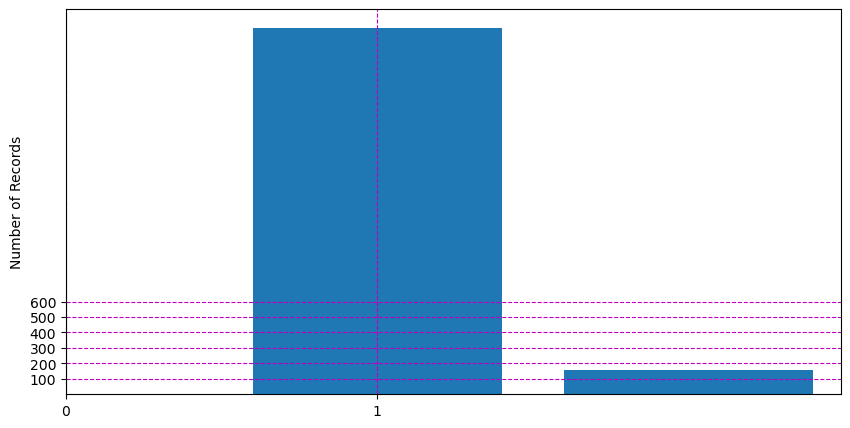

In [6]:
fig = plt.figure(figsize =(10,5))
unique, counts = np.unique(da_imb["Class"], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
plt.bar(*zip(*CountOfClasses.items()))
plt.grid(linestyle = "dashed", color = "m")
plt.xticks([0,1])
plt.yticks(range(100,650,100))
plt.ylabel("Number of Records")
plt.show()

### Here we can see that the class need's Label Encoding

## As we can see the data is imbalanced

In [10]:
print(da_imb["Class"].dtypes)
print(da_imb["Class"].unique())

int64
[1 2]


In [11]:
label = LabelEncoder()
da_imb["Class"] = label.fit_transform(da_imb["Class"])

In [12]:
print(da_imb["Class"].dtypes)
print(da_imb["Class"].unique())

int64
[0 1]


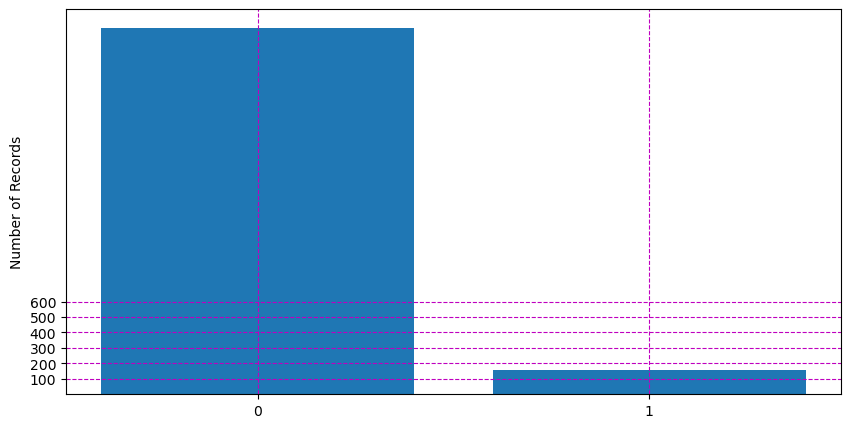

In [13]:
fig = plt.figure(figsize =(10,5))
unique, counts = np.unique(da_imb["Class"], return_counts=True)
CountOfClasses=dict(zip(unique, counts))
plt.bar(*zip(*CountOfClasses.items()))
plt.grid(linestyle = "dashed", color = "m")
plt.xticks([0,1])
plt.yticks(range(100,650,100))
plt.ylabel("Number of Records")
plt.show()

### Feature Selection

In [28]:
from sklearn.feature_selection import VarianceThreshold
dataFeatures = da_imb.iloc[:,0:-1]
DataLabel = da_imb[ "Class"]
da_imb.var()

V1          1.426992
V2          1.419243
V3          1.358743
V4          1.285747
V5          1.271308
            ...     
V69       119.882226
V70      2644.851146
V71      1203.628430
V72         1.735643
Class       0.059178
Length: 73, dtype: float64

In [29]:
vt = VarianceThreshold(threshold=50)
vt.fit(dataFeatures)
varince_of_data = pd.DataFrame({'variance': vt.variances_,'select_feature': vt.get_support()},index=dataFeatures.columns)
varince_of_data[varince_of_data["select_feature"] == True]

,variance,select_feature
V33,52.421489,True
V34,57.466592,True
V35,57.522551,True
V36,55.777311,True
V37,54.771806,True
V38,53.757692,True
V39,52.888613,True
V40,51.511778,True
V41,50.378709,True
V57,1295.477869,True


In [30]:
subset_FS = dataFeatures.iloc[:,vt.get_support()].head()
subset_FS.columns

Index(['V33', 'V34', 'V35', 'V36', 'V37', 'V38', 'V39', 'V40', 'V41', 'V57',
       'V62', 'V65', 'V67', 'V68', 'V69', 'V70', 'V71'],
      dtype='object')

In [31]:
dataFeatures = dataFeatures[subset_FS.columns]
dataFeatures

,V33,V34,V35,V36,V37,V38,V39,V40,V41,V57,V62,V65,V67,V68,V69,V70,V71
0,5.2,5.4,7.2,10.6,14.5,17.2,18.3,18.9,19.1,1612.00000,3178.500000,10.670000,5795.000000,-12.100000,17.900000,10330.00000,-55.000000
1,16.2,16.2,16.6,17.8,19.4,20.6,21.2,21.8,22.4,1594.50000,3172.000000,8.390000,5805.000000,14.050000,29.000000,10275.00000,-55.000000
2,16.9,16.9,17.1,17.6,19.1,21.3,21.8,22.0,22.1,1568.50000,3160.000000,6.940000,5790.000000,17.900000,41.300000,10235.00000,-40.000000
3,18.5,18.7,18.6,18.8,19.0,19.0,19.3,19.4,19.6,1546.50000,3145.500000,8.730000,5775.000000,31.150000,51.700000,10195.00000,-40.000000
4,19.2,19.4,19.8,20.5,21.1,21.9,23.8,25.1,25.8,1531.49426,3145.420501,9.872418,5818.821222,10.511051,37.388335,10164.19844,-0.119949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,1.2,1.1,3.8,7.6,10.7,12.6,13.9,14.5,14.7,1576.00000,3153.500000,7.930000,5800.000000,-25.600000,21.800000,10295.00000,65.000000
2530,7.7,7.8,9.4,12.4,15.5,17.3,17.9,18.4,18.3,1600.50000,3189.000000,5.950000,5845.000000,-19.400000,19.100000,10310.00000,15.000000
2531,14.9,15.6,17.1,18.6,19.2,19.8,20.4,20.6,19.9,1591.00000,3181.000000,7.800000,5845.000000,-9.600000,35.200000,10275.00000,-35.000000
2532,18.4,18.4,18.9,18.8,18.9,20.1,21.9,23.3,23.6,1581.50000,3170.500000,7.720000,5845.000000,-19.600000,34.200000,10245.00000,-30.000000


## let's check outliers:

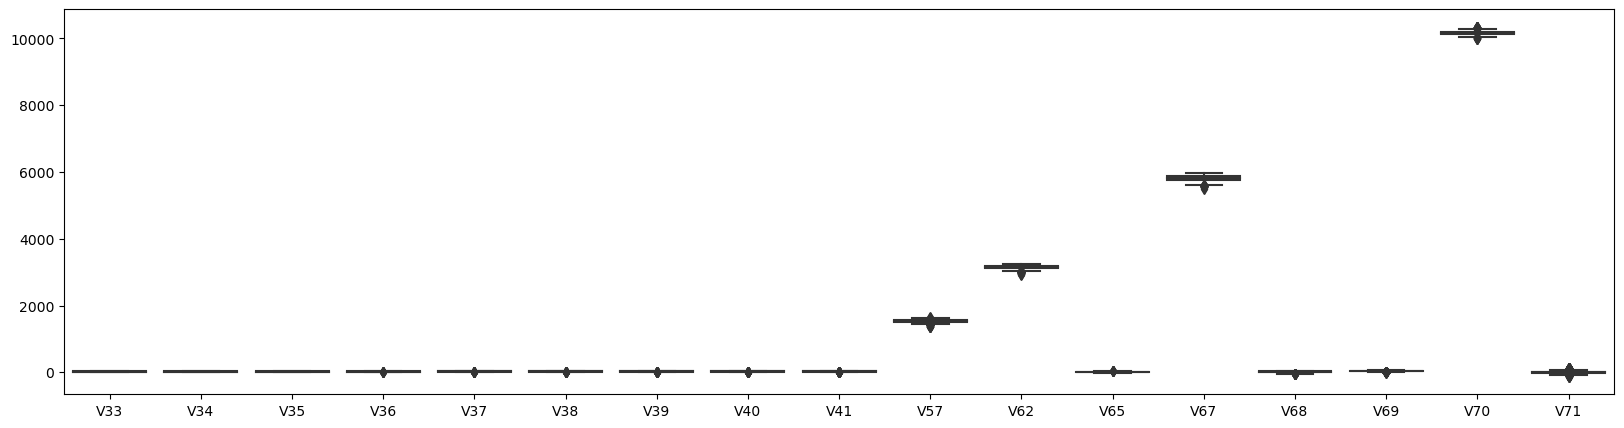

In [33]:
##checking outliers
dataFeatures = dataFeatures.iloc[:, :]
plt.figure(figsize=(20,5)) 
sns.boxplot(data = dataFeatures, palette='winter')
plt.show()

In [72]:
x = dataFeatures.iloc[:,:-1]
y = DataLabel

In [44]:
Xdata_bef=da_imb.iloc[:,:72]

In [45]:
Xdata_bef

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V63,V64,V65,V66,V67,V68,V69,V70,V71,V72
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,-15.50000,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.00000,-55.000000,0.00
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,-14.50000,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.00000,-55.000000,0.00
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,-15.90000,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.00000,-40.000000,0.00
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,-16.80000,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.00000,-40.000000,2.08
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,-10.51141,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.19844,-0.119949,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2529,0.3,0.4,0.5,0.5,0.2,0.3,0.4,0.4,1.3,2.2,...,-12.40000,0.070000,7.930000,-4.410000,5800.000000,-25.600000,21.800000,10295.00000,65.000000,0.00
2530,1.0,1.4,1.1,1.7,1.5,1.7,1.8,1.5,2.1,2.4,...,-12.00000,0.040000,5.950000,-1.140000,5845.000000,-19.400000,19.100000,10310.00000,15.000000,0.00
2531,0.8,0.8,1.2,0.9,0.4,0.6,0.8,1.1,1.5,1.5,...,-11.80000,0.060000,7.800000,-0.640000,5845.000000,-9.600000,35.200000,10275.00000,-35.000000,0.00
2532,1.3,0.9,1.5,1.2,1.6,1.8,1.1,1.0,1.9,2.0,...,-10.80000,0.250000,7.720000,-0.890000,5845.000000,-19.600000,34.200000,10245.00000,-30.000000,0.05


In [46]:
ydata_bef=da_imb.iloc[:,72:]

In [47]:
ydata_bef

,Class
0,0
1,0
2,0
3,0
4,0
...,...
2529,0
2530,0
2531,0
2532,0


In [60]:
outlierDetector =  LocalOutlierFactor(n_neighbors=20)
result=outlierDetector.fit_predict(x)
Outliers=x[result==-1]
print("Number of detected outliers is " +str(len(Outliers)))

Number of detected outliers is 66


In [61]:
x.shape

(2534, 16)

In [62]:
newX = x[result != -1]
newY = y[result != -1]

In [63]:
newX.shape

(2468, 16)

# Spliting the data

In [83]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(Xdata_bef, ydata_bef, test_size=0.3,random_state=42)

#### Train a model before outlier detection

In [84]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train1, y_train1)
y_predd=rf.predict(x_test1)

C:\Users\kaboz\AppData\Local\Temp\ipykernel_19600\2162226257.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train1, y_train1)


In [85]:
print("ACC of model: %.4f before outlier detection" %accuracy_score(y_predd,y_test1))

ACC of model: 0.9409 before outlier detection


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


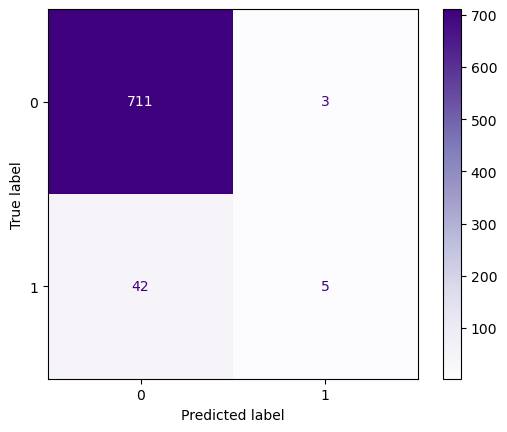

In [86]:
plot_confusion_matrix(rf,x_test1,y_test1,cmap='Purples')

#### Train a model after outlier detection

In [87]:
newX = x[result != -1]
newY = y[result != -1]

In [88]:
x_train, x_test, y_train, y_test = train_test_split(newX, newY, test_size=0.3,random_state=42)

In [89]:
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [90]:
print("ACC of model: %.4f After outlier detection" %accuracy_score(y_pred,y_test))

ACC of model: 0.9406 After outlier detection


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


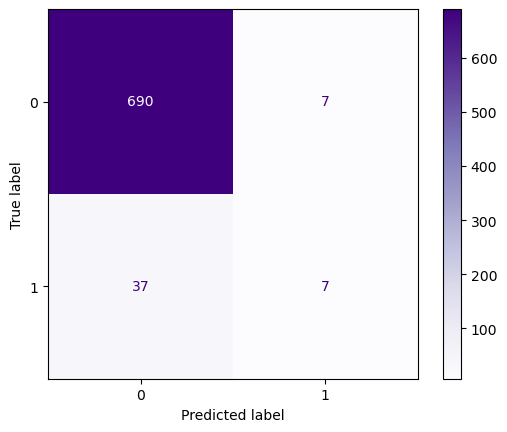

In [91]:
plot_confusion_matrix(rf,x_test,y_test,cmap='Purples')

## Removing outliers is an important step for increasing the model's accuracy.

In [96]:
da_imb.value_counts()

V1        V2        V3       V4        V5        V6        V7        V8        V9        V10       V11       V12       V13       V14       V15       V16       V17     V18       V19       V20       V21       V22       V23       V24       V25       V26       V27        V28       V29        V30        V31        V32        V33        V34        V35        V36        V37        V38        V39        V40        V41        V42        V43        V44      V45        V46        V47        V48        V49        V50       V51        V52        V53        V54      V55         V56        V57         V58        V59       V60         V61         V62          V63        V64       V65         V66         V67          V68         V69        V70          V71         V72   Class
1.640179  1.586351  1.54558  1.526405  1.522624  1.542417  1.637896  2.047127  2.539037  2.847708  2.969768  3.016414  3.044148  3.106679  3.177738  3.231005  3.1928  2.934562  2.561343  2.285638  2.089554  1.938376  1.803805  1.7

In [99]:
from imblearn.over_sampling import SMOTE,RandomOverSampler
oversample = SMOTE(random_state=42)
overX,overY=oversample.fit_resample(newX, newY)

In [110]:
scaler = StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)

In [111]:
from sklearn.preprocessing import StandardScaler,LabelEncoder
x_train, x_test, y_train, y_test = train_test_split(overX, overY, test_size=0.3,random_state=42)
x_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(x_test)
rf= RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)

In [114]:
print("ACC of model: %.4f After SMOTE detection" %accuracy_score(y_pred,y_test))

ACC of model: 0.9359 After SMOTE detection


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


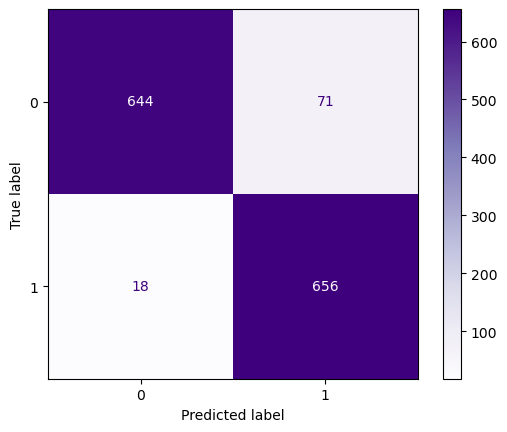

In [116]:
plot_confusion_matrix(rf,x_test,y_test,cmap='Purples')

In [129]:
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as imbPipeline

In [139]:
Pipe=Pipeline([('Scaler', StandardScaler()),('model', RandomForestClassifier(n_estimators=99, random_state=42))])

In [140]:
Pipe.fit(x_train,y_train)

Pipeline(steps=[('Scaler', StandardScaler()),
                ('model',
                 RandomForestClassifier(n_estimators=99, random_state=42))])

In [141]:
y_pred=Pipe.predict(x_test)
print("ACC of model: %.4f with PipeLine "%accuracy_score(y_pred,y_test))

ACC of model: 0.9345 with PipeLine 


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


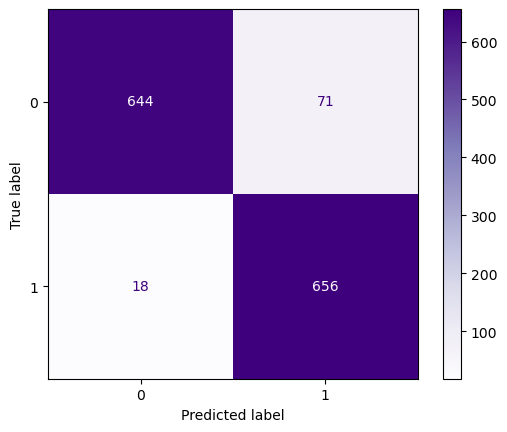

In [142]:
plot_confusion_matrix(rf,x_test,y_test,cmap='Purples')

In [143]:
PP=imbPipeline(steps=[('overSample',SMOTE(k_neighbors=4, random_state=42)),('Scaler', StandardScaler()),\
                ('model', RandomForestClassifier(n_estimators=100, random_state=42))])
PP.fit(x_train,y_train)

Pipeline(steps=[('overSample', SMOTE(k_neighbors=4, random_state=42)),
                ('Scaler', StandardScaler()),
                ('model', RandomForestClassifier(random_state=42))])

In [144]:
y_pred=PP.predict(x_test)
print("ACC of model: %.4f with IMPipeLine "%accuracy_score(y_pred,y_test))

ACC of model: 0.9330 with IMPipeLine 


C:\Users\kaboz\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


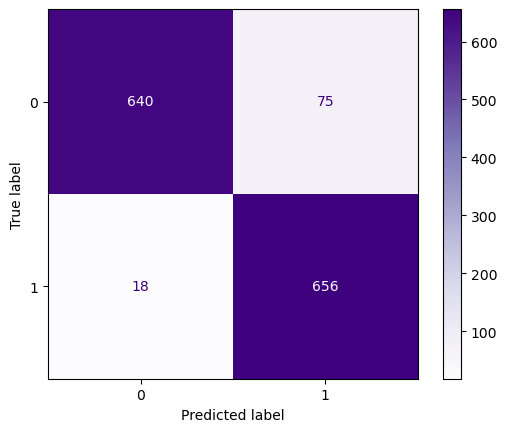

In [145]:
plot_confusion_matrix(PP,x_test,y_test,cmap='Purples')

# As said before, if it works, don't touch it...!